In [62]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [63]:
# Step 1
n_samples = 200 
cluster_1_centre = [2,2] 
cluster_2_centre = [6,6] 
spread = 1
# (200) - Number of points we are going to model.
# [2,2] - Centre of the first cluster
# [6,6] - Centre of cluster 2
# (1)   - How spread-out the two clusters (blobs) are
data, labels = make_blobs(n_samples=n_samples,
                          centers=(cluster_1_centre, cluster_2_centre),
                          cluster_std = spread, 
                          random_state=0)

In [64]:
data[0:5]

array([[4.26975462, 0.54563433],
       [6.27451636, 5.10908492],
       [2.06651722, 2.3024719 ],
       [0.77456448, 2.84436298],
       [1.19659034, 1.31045022]])

In [65]:
labels[0:5]

array([0, 1, 0, 0, 0])

In [66]:
colours = ('green', 'red')

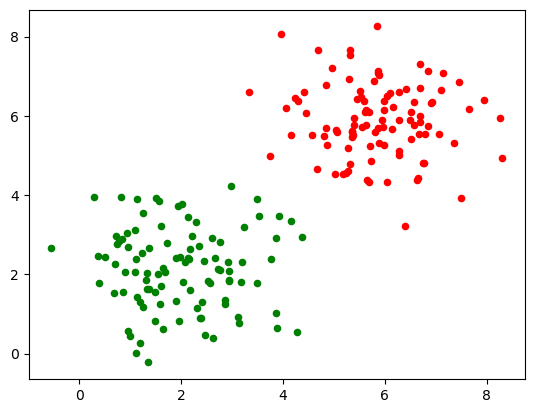

In [67]:
fig, ax = plt.subplots() 
for n_class in range(2):
    plt.scatter(data[labels==n_class][:, 0], 
                data[labels==n_class][:, 1],
                c=colours[n_class], 
                s=20, 
                label=str(n_class))

In [68]:
#Step 2
theta_0 = -4 
theta_1 = 2.3 
theta_2 = 4.2
# ( start value -4) this is the bias term for the perceptron
# ( start value 2.3 )
# ( start value 4.2 )

In [69]:
net_input = theta_0 + theta_1 * data[:,0] + theta_2 * data[:,1] 
classification = list(map( lambda x : 1 if x>0 else 0, net_input))

In [70]:
print(classification)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [71]:
number_correct = sum(x == y for x, y in zip(labels, classification)) 
number_correct

103

In [72]:
score = number_correct / n_samples 
score

0.515

In [73]:
from sklearn.model_selection import train_test_split 
datasets = train_test_split(data,
                            labels, test_size=0.2)
train_data, test_data, train_labels, test_labels = datasets

In [74]:
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42, max_iter=500, tol=1) 
p.fit(train_data, train_labels);

In [75]:
print('theta 1 = ', p.coef_[0][0]) 
print('theta_2 = ', p.coef_[0][1])

theta 1 =  3.92051451600073
theta_2 =  3.7388283130462066


In [76]:
print( 'theta_0 = ', p.intercept_[0])

theta_0 =  -29.0


In [77]:
from sklearn.metrics import accuracy_score

predictions_train = p.predict(train_data)
predictions_test = p.predict(test_data)
train_score = accuracy_score(predictions_train, train_labels) 
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, test_labels) 
print("score on test data: ", test_score)

score on train data:  1.0
score on test data:  1.0


In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout 
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#将import keras改成 from tensorflow.keras.package

In [79]:
fashion = keras.datasets.fashion_mnist 
(train_images,train_labels),(test_images,test_labels) = fashion.load_data()

In [80]:
print(train_images.shape) 
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [81]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

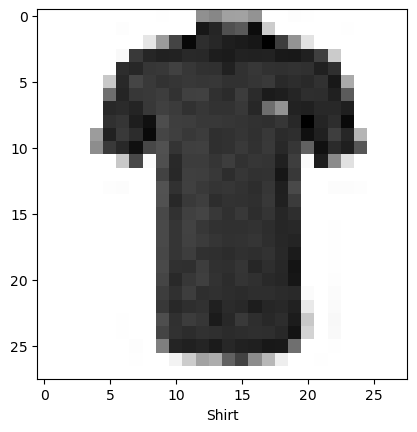

In [82]:
image_number = 1200
plt.figure()
plt.imshow(train_images[image_number], cmap=plt.cm.binary) 
plt.xlabel(class_names[train_labels[image_number]]) 
plt.grid(False)
plt.show()

In [83]:
train_images = keras.utils.normalize(train_images, axis=1) 
test_images = keras.utils.normalize(test_images, axis=1)

In [84]:
train_images[1][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00163724, 0.        , 0.        , 0.        , 0.        ,
       0.04180052, 0.18134076, 0.10028745, 0.05368613, 0.04603788,
       0.04237663, 0.08378428, 0.16247149, 0.13003419, 0.01660002,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [85]:
model = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(10, activation='softmax')
]);

In [86]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [88]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 853us/step - loss: 0.5081 - accuracy: 0.8173
Epoch 2/10
1875/1875 [==============================] - 2s 839us/step - loss: 0.3728 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 2s 840us/step - loss: 0.3334 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 2s 837us/step - loss: 0.3078 - accuracy: 0.8869
Epoch 5/10
1875/1875 [==============================] - 2s 838us/step - loss: 0.2895 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 2s 834us/step - loss: 0.2754 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 2s 846us/step - loss: 0.2614 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 2s 836us/step - loss: 0.2493 - accuracy: 0.9061
Epoch 9/10
1875/1875 [==============================] - 2s 835us/step - loss: 0.2407 - accuracy: 0.9097
Epoch 10/10
1875/1875 [==============================] - 2s 929u

In [89]:
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 603us/step - loss: 0.3254 - accuracy: 0.8810

Test accuracy: 0.8809999823570251


In [90]:
test_item = 120
label = test_labels[test_item]
print('Label = ', label, ' : ', class_names[label])

Label =  0  :  T-shirt/top


Text(0.5, 0, 'T-shirt/top')

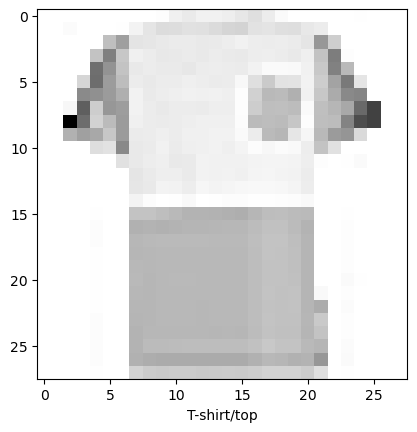

In [91]:
test_image = test_images[test_item] 
plt.imshow(test_image, cmap=plt.cm.binary) 
plt.xlabel(class_names[test_labels[test_item]])

In [92]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 516us/step


In [93]:
predictions[test_item]

array([9.9808830e-01, 1.1935465e-11, 1.8436868e-04, 4.4490218e-05,
       2.5569105e-07, 3.8199855e-06, 1.6786936e-03, 7.5431078e-13,
       1.3464158e-07, 1.4762936e-09], dtype=float32)

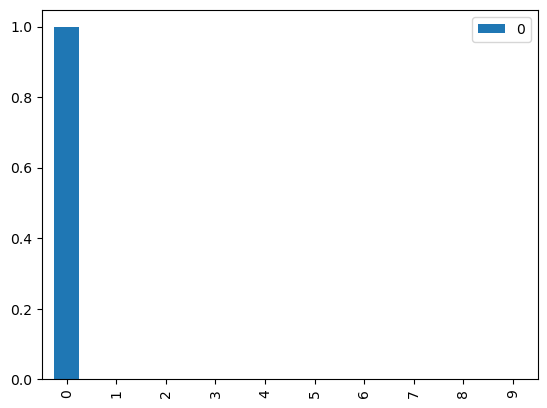

In [94]:
df = pd.DataFrame(predictions[test_item]) 
ax = df.plot.bar()

In [95]:
predicted_label = np.argmax(predictions[test_item])
print('Predicted label = ', predicted_label, ' : ', class_names[predicted_label])

Predicted label =  0  :  T-shirt/top
